## Relationship Among Tissues and Cellular Compartments Based on Protein Expression

In this notebook, I would show the relationship between cellular compartments and tissues, based on protein expression. The dataset to be used contains **381 proteins** and their **log2 transformed** abundances in different cellular compartments. To do any kind of anlysis, I need to first import the relevant libraries for machine learning, data manipulaiton and plotting

In [316]:
# import ML libraries
from sklearn.manifold import TSNE
import umap

# import data visualisation and manipulation libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next I read in the data and check the first five rows to ensure the data is properly formated

In [317]:
# read the data
data = pd.read_csv('Tissue_data_extracted_from_Wangetal')

# view the first five of data 
data.head()

,Uniprot_Protein_ID,GeneID,Gene_name,Subcell_location,Tonsil,Liver,Spleen,Stomach,Brain,Lung,...,Prostate,Appendix,Pancreas,Ovary,Placenta,Rectum,Fat,Lymph_node,Salivary_gland,Adrenal_gland
0,Q96Q42,ENSG00000003393,ALS2,NaN,3.131226,2.129931,-0.864097,0.000000,4.767002,1.249858,...,-1.376821,-0.705751,0.585787,-0.018125,0.970010,-0.427234,-2.606809,-2.805383,-1.587095,-0.581118
1,Q7L592,ENSG00000003509,NDUFAF7,Mitochondria,-1.776002,2.022457,-1.228192,-2.001788,1.637685,1.838643,...,-2.972171,-4.836021,0.000000,-0.274598,-0.095711,2.680482,-1.335548,-0.859624,-0.633762,0.517193
2,O60341,ENSG00000004487,KDM1A,Nucleus,-0.772098,3.905057,3.718920,-2.512499,1.678973,3.211527,...,2.502365,-4.060980,-0.990497,0.000000,0.676202,-1.612452,-3.630868,-0.944005,-1.930206,4.072886
3,P30260,ENSG00000004897,CDC27,Nucleus,1.089718,-0.534078,-0.184388,-1.505493,0.918199,1.928186,...,-1.749915,-4.075916,-0.273083,1.286109,1.724076,2.528039,-0.425469,-0.018557,0.062296,-0.077761
4,Q9UPZ6,ENSG00000005108,THSD7A,NaN,-3.060300,5.970897,-0.470134,-1.068514,2.464643,0.129501,...,-1.175660,-1.526568,2.415589,0.000000,2.646928,0.136376,-1.181722,-1.737693,-0.068660,-1.095008


It can be seen from the first few rows that there are some missing values in the 'Subcell_location' column. But th e purpose of this notebook is just to visualise the components of the dimensionality reduction algorithms we would use so we would ignore these. However, it is important that the abundance columns do not contain null values hence, I would check that next.

In [318]:
# check for number of missing values
data.isnull().sum().sum() # 110 missing values present

110

In [319]:
#### check for columns with null values
data.isnull().any() # all 110 missing values in 'Subcell_location' column

Uniprot_Protein_ID    False
GeneID                False
Gene_name             False
Subcell_location       True
Tonsil                False
Liver                 False
Spleen                False
Stomach               False
Brain                 False
Lung                  False
Testis                False
Duodenum              False
Small_intestine       False
Urinary_bladder       False
Gall_bladder          False
Esophagus             False
Heart                 False
Thyroid               False
Endometrium           False
Colon                 False
Fallopian_tube        False
Kidney                False
Smooth_muscle         False
Prostate              False
Appendix              False
Pancreas              False
Ovary                 False
Placenta              False
Rectum                False
Fat                   False
Lymph_node            False
Salivary_gland        False
Adrenal_gland         False
dtype: bool

From the above blocks of code, there are **110 missing values** in the data and thankfully, they are **all in the subcell_location** column hence we ignore them.

Next, I prepare the data for dimensionality reduction and plotting of the relationship among tissues based in protein expression.

In [320]:
# select abundance columns
abundance = data.iloc[:, 4:]

# transpose abundance data
abundance_transposed = X.T

# extract tissue names
tissues = pd.Series(abundance_transposed.index, name='tissues')

Next, I instantiate the tsne and umap algorithms with `perplexity=2` and `n_neighbors=2` respectively. Both arguments work in a similar fashion and setting them to 2 makes the algorithm see more of the local structure of the data than its global structure.

In [321]:
# instantiate tsne and umap objects
tsne = TSNE(n_components=2, perplexity=2)
reducer = umap.UMAP(n_components=2, n_neighbors=2)

# obtain top two tsne and umap components from abundances
tissue_tsne_components = tsne.fit_transform(abundance_transposed)
tissue_umap_components = reducer.fit_transform(abundance_transposed)

/Users/s2124052/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Next, I prepare the data for plotting

In [322]:
# tsne
tissue_tsne_components_tab = pd.DataFrame(
    tissue_tsne_components,
    columns=['tsne_component_1', 'tsne_component_2'])

# umap
tissue_umap_components_tab = pd.DataFrame(
    tissue_umap_components,
    columns=['umap_component_1', 'umap_component_2'])

# create table for plotting
tissue_comp = pd.concat(
    [tissue_umap_components_tab, tissue_tsne_components_tab, tissues], axis=1)

I then use seaborn's `sns.scatterplot()` method to make a scatter plot of the top two components each from the two dimensionality algorithms used.

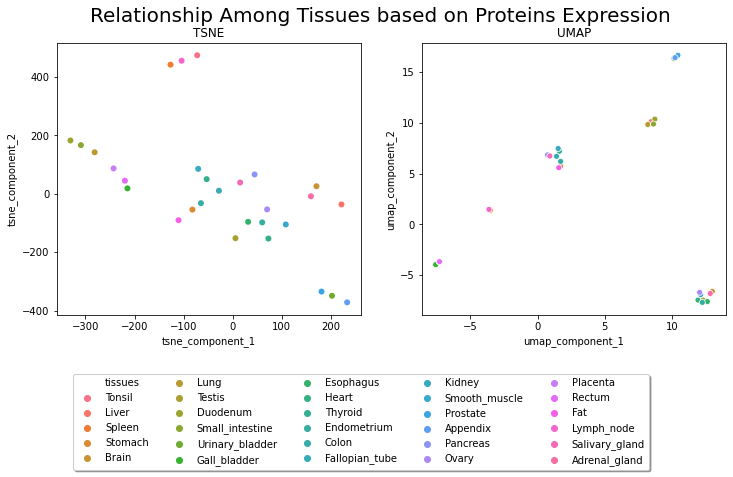

In [323]:
# set figure and axes objects
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# plot the tsne components
a = sns.scatterplot(
    x='tsne_component_1',
    y='tsne_component_2',
    data=tissue_comp,
    hue='tissues',
    edgecolor="none",
    ax=ax1
)
ax1.set_title('TSNE')
a.legend().remove()
# plot the umap components
g = sns.scatterplot(
    x='umap_component_1',
    y='umap_component_2',
    data=tissue_comp,
    hue='tissues'
)
ax2.set_title("UMAP")
g.legend().remove()
_ = a.legend(loc='upper center', bbox_to_anchor=(1, -0.20),
          fancybox=True, shadow=True, ncol=5)
_ = fig1.suptitle('Relationship Among Tissues based on Proteins Expression', size=20)

Next, I repeat the same steps but this time, I use the abundances based on sub cellular location. Also I set `perplexity=15` and `n_neighbors=15` for the algorithm to get a bot more global structure.

In [324]:
# instantiate tsne and umap objects
tsne = TSNE(n_components=2, perplexity=15)
reducer = umap.UMAP(n_components=2, n_neighbors=15)

# obtain top two tsne and umap components from abundances
sc_tsne_components = tsne.fit_transform(abundance)
sc_umap_components = reducer.fit_transform(abundance)

In [325]:
# tsne
sc_tsne_components_tab = pd.DataFrame(
    sc_tsne_components,
    columns=['tsne_component_1', 'tsne_component_2'])

# umap
sc_umap_components_tab = pd.DataFrame(
    sc_umap_components,
    columns=['umap_component_1', 'umap_component_2'])

# create table for plotting
sc_comp = pd.concat(
    [sc_umap_components_tab, sc_tsne_components_tab, data.Subcell_location], axis=1)

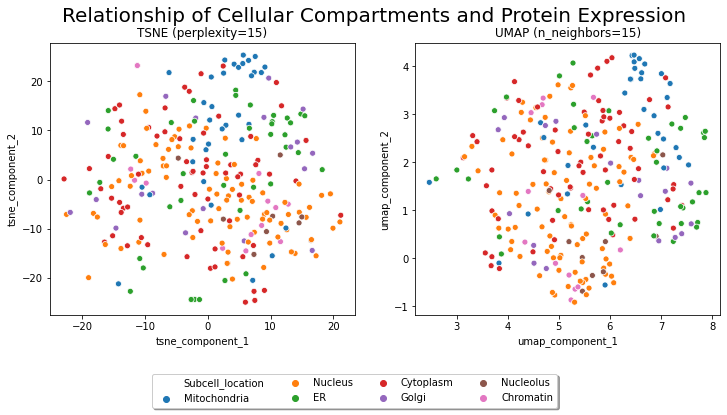

In [326]:
# set figure and axes objects
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# plot the tsne components
a = sns.scatterplot(
    x='tsne_component_1',
    y='tsne_component_2',
    data=sc_comp,
    hue='Subcell_location',
    ax=ax1
)
ax1.set_title('TSNE (perplexity=15)')
a.legend().remove()
# plot the umap components
g = sns.scatterplot(
    x='umap_component_1',
    y='umap_component_2',
    data=sc_comp,
    hue='Subcell_location'
)
ax2.set_title("UMAP (n_neighbors=15)")
g.legend().remove()
_ = a.legend(loc='upper center', bbox_to_anchor=(1, -0.20),
          fancybox=True, shadow=True, ncol=4)
_ = fig1.suptitle('Relationship of Cellular Compartments and Protein Expression', size=20)